## Imports

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import dataframe_image as dfi

In [2]:
dir_files = '../Dataset/'
col_labels = [
    'Dev Id',
    'Acc X',
    'Acc Y',
    'Acc Z',
    'Gyr X',
    'Gyr Y',
    'Gyr Z',
    'Mag X',
    'Mag Y',
    'Mag Z',
    'Timestamp',
    'Label'
]

act_labels = np.array([
    'Stand',
    'Sit',
    'Sit and Talk',
    'Walk',
    'Walk and Talk',
    'Climb Stairs (CS)',
    'CS and Talk',
    'Stand to Sit',
    'Sit to Stand',
    'Stand to Sit and Talk',
    'Sit to Stand and Talk',
    'Stand to Walk',
    'Walk to Stand',
    'Stand to CS/CS and Talk',
    'CS to Walk',
    'CS and Talk to Walk and Talk'
])

modules_labels = [
    'N Total',
    'N Outliers',
    'Density'
]

k_values = [
    3,
    3.5,
    4
]

acts = np.array([
    1,
    8,
    14
])

## Read Files

In [3]:
def read_file(id=0, dev=2):
    file_path = dir_files + 'part' + str(id) + '/part' + str(id) + 'dev' + str(dev) + '.csv'

    csv_file = open(file_path)
    csv_reader = csv.reader(csv_file, delimiter=',')
    data_np = np.array(list(csv_reader)).astype(float)

    data = pd.DataFrame(data_np)
    data.columns = col_labels
    
    return [data,data_np]
    

[data,data_np] = read_file()
data

Dev Id   Acc X   Acc Y   Acc Z     Gyr X    Gyr Y     Gyr Z    Mag X  \
0         2.0  3.0317  9.0450  3.1739  0.762470  3.70710 -0.313840  0.57764   
1         2.0  2.9591  9.0436  3.1400  0.405880  4.66820 -0.101480  0.58385   
2         2.0  2.9465  9.0545  3.0799  0.242300  5.52250  0.348570  0.56522   
3         2.0  2.7898  9.0528  3.0726  0.498580  6.34630  0.611270  0.56108   
4         2.0  2.6924  9.0377  2.9794  0.631970  6.69720  1.005600  0.57764   
...       ...     ...     ...     ...       ...      ...       ...      ...   
52859     2.0  2.3837  9.0681  3.4339 -0.429610 -1.75440 -0.300480  0.35197   
52860     2.0  2.4075  8.9945  3.3985 -0.279800 -1.72390  0.129850  0.35197   
52861     2.0  2.3837  9.0316  3.4346 -0.043147 -0.77803  0.195980  0.32919   
52862     2.0  2.3236  9.0922  3.4472 -0.125830 -0.56445 -0.016121  0.33747   
52863     2.0  2.2991  9.1032  3.3996 -0.532890 -1.52560  0.026206  0.33333   

         Mag Y    Mag Z    Timestamp  Label  
0      0.68849  1.26540       63.629    1.0  
1      0.68849  1.27410       83.160    1.0  
2      0.67857  1.26750      102.690    1.0  
3      0.65476  1.26100      122.220    1.0  
4      0.69246  1.26750      141.750    1.0  
...        ...      ...          ...    ...  
52859  0.88294  0.69737  1039200.000    1.0  
52860  0.86706  0.69079  1039200.000    1.0  
52861  0.84722  0.69956  1039300.000    1.0  
52862  0.88889  0.70614  1039300.000    1.0  
52863  0.82937  0.69737  1039300.000    1.0  

[52864 rows x 12 columns]

## Modules

In [4]:
def calc_mod(data):
    acc = np.sqrt((data['Acc X']**2 + data['Acc Y']**2 + data['Acc Z']**2))
    gyr = np.sqrt((data['Gyr X']**2 + data['Gyr Y']**2 + data['Gyr Z']**2))
    mag = np.sqrt((data['Mag X']**2 + data['Mag Y']**2 + data['Mag Z']**2))
    
    frame = {
        'Dev Id': data['Dev Id'],
        'Acc': acc,
        'Gyr': gyr,
        'Mag': mag,
        'Timestamp': data['Timestamp'],
        'Label': data['Label']
    }
    
    return pd.DataFrame(frame)

data = calc_mod(data)
data

Dev Id        Acc       Gyr       Mag    Timestamp  Label
0         2.0  10.053699  3.797690  1.552071       63.629    1.0
1         2.0  10.020108  4.686910  1.561483       83.160    1.0
2         2.0  10.007578  5.538792  1.544826      102.690    1.0
3         2.0   9.958767  6.395135  1.527626      122.220    1.0
4         2.0   9.889685  6.801699  1.555547      141.750    1.0
...       ...        ...       ...       ...          ...    ...
52859     2.0   9.985196  1.831058  1.178894  1039200.000    1.0
52860     2.0   9.911957  1.751280  1.163128  1039200.000    1.0
52861     2.0   9.952301  0.803493  1.146966  1039300.000    1.0
52862     2.0   9.997520  0.578530  1.184333  1039300.000    1.0
52863     2.0   9.985559  1.616204  1.133706  1039300.000    1.0

[52864 rows x 6 columns]

## Density

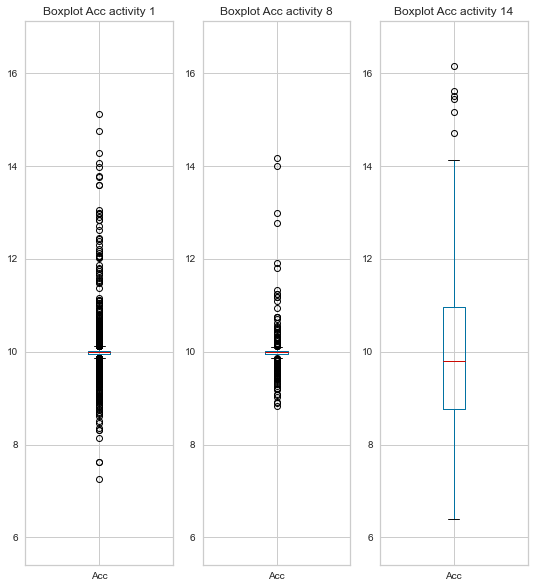

Label  N Total  N Outliers    Density
1                     Stand    11012         762   6.919724
8              Stand to Sit      384         116  30.208333
14  Stand to CS/CS and Talk      254           6   2.362205

In [5]:
def get_density_outliers(data_act):
    k=1.5
    column = data_act.columns[0]

    quart = data_act[column].quantile([0.25,0.75])
    iqr = quart[0.75] - quart[0.25]
    lim = [quart[0.25] - k*iqr, quart[0.75] + k*iqr]

    outliers = data_act.loc[(data_act[column] < lim[0]) | (data_act[column] > lim[1])]
    not_outliers = data_act.loc[(data_act[column] >= lim[0]) & (data_act[column] <= lim[1])]

    return [outliers,not_outliers]

def getDensity(data_act):

    outliers = get_density_outliers(data_act)[0]

    n = data_act.shape[0]

    return [outliers.shape[0] / n * 100, n, outliers.shape[0]]  #densidade, nº de pontos, nº de outliers

def plotBoxplot(data,vec_name):
    column = data.columns[0]

    plt.figure(figsize=(3*len(acts),10))
    act_title=''

    min_v = data.loc[data['Label'].isin(acts),vec_name].min().min()
    max_v = data.loc[data['Label'].isin(acts),vec_name].max().max()
    amp = max_v - min_v

    for i in range(1,len(acts)+1):
        act = acts[i-1]
        plt.subplot(1,len(acts),i)

        data_act = data.loc[data['Label'] == act]

        box = data_act[vec_name].plot.box()
        plt.title('Boxplot ' + vec_name + ' activity ' + str(act))
        if(i!=1):
            act_title += ','
        act_title += str(act)

        box.set_ylim(min_v - 0.1*amp, max_v + 0.1*amp)

    plt.savefig('../Plots/Boxplots/'+'boxplot-' + vec_name + '-acts-' + act_title)
    
    plt.show()

def evaluateDensity(data,title):
    density = [act_labels[acts-1],[],[],[]]
    
    for act in acts:
        data_act = data.loc[data['Label'] == act]
        [dens,n,n_out] = getDensity(data_act)
        density[1].append(n)
        density[2].append(n_out)
        density[3].append(dens)
    
    density[0] = pd.DataFrame(density[0])
    density[0].columns = ['Label']

    for i in range(1,len(density)):
        density[i] = pd.DataFrame(density[i])
        density[i].columns = [modules_labels[i-1]]
    
    density = pd.concat(density,axis=1)
    density.index = acts
    plotBoxplot(data,title)
    
    return density
    
density_acc = evaluateDensity(data[['Acc','Label']], 'Acc')
display(density_acc)

density = density_acc

### 3.2.
<p> As atividades 8 a 11 consistem alternar entre estar em pé e sentado, ou vice-versa, enquanto o indivíduo realiza outras atividades (falar). A densidade de outliers nestes casos é muito alto. Isto pode dever-se a 2 coisas: 

<ul>
<li> O indivíduo pode ter-se movimentado mais rápido nuns momentos do que noutros, gerando uma grande variedade nos valores. 
<li> Como há menos momentos destas atividades (como podemos observar na tabela na columa 'Acc_n'), e dada a situação anterior, os momentos que se tornam outliers tornam-se demasiados em comparação com o número de momentos da atividade em causa.
<ul>

<p> As atividades semelhantes, como <em>Climb Stairs to Walk</em> e <em>Climb Stairs and Talk to Walk and Talk</em> têm densidades semelhantes. Conclui-se, assim, que adicionar a atividade <em>Talk</em> não modifica de forma significativa o número de outliers. Tal acontece também nas outras atividades que apenas é adicionado o <em>Talk</em>, a diferença da densidade de outliers é pequena.

<p> Na atividade <em>Sit</em> (atividade 2) e <em>Sit and Talk</em>, o intervalo de valores é pequeno pois, quando uma pessoa está sentada, não se movimenta pelo que a aceleração no eixo <em>xx'</em> e <em>yy'</em> é perto de 0.

<p> Nas atividades <em>Climb</em> e <em>Climb and Talk</em>, o intervalo de valores é alto pois o indivíduo tem, geralmente, uma aceleração inconstante quando sobe ou desce escadas, gerando os outliers. A densidade é baixa mas quando é gerado um outlier, este tem um valor muito longe da média.

## Z-Score

Label  N Total  Boxplot  Z-score k=3  Z-score k=3.5  \
1                     Stand    11012      762          128            109   
8              Stand to Sit      384      116            6              6   
14  Stand to CS/CS and Talk      254        6            2              0   

    Z-score k=4  
1            98  
8             4  
14            0

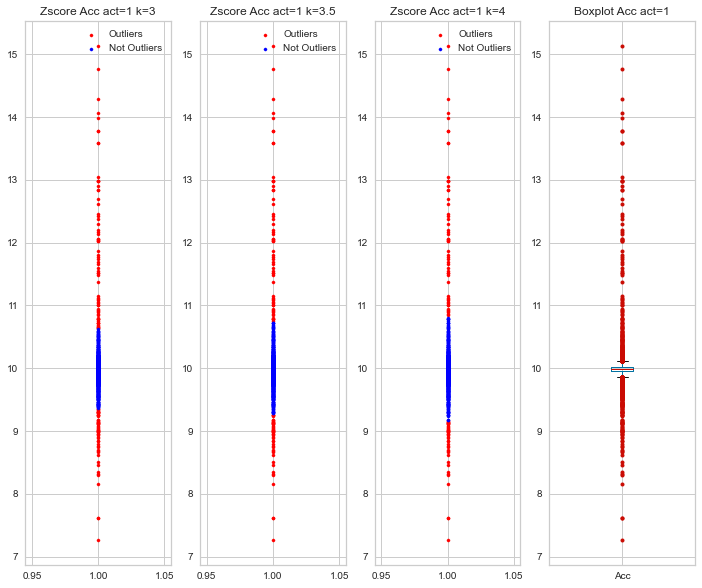

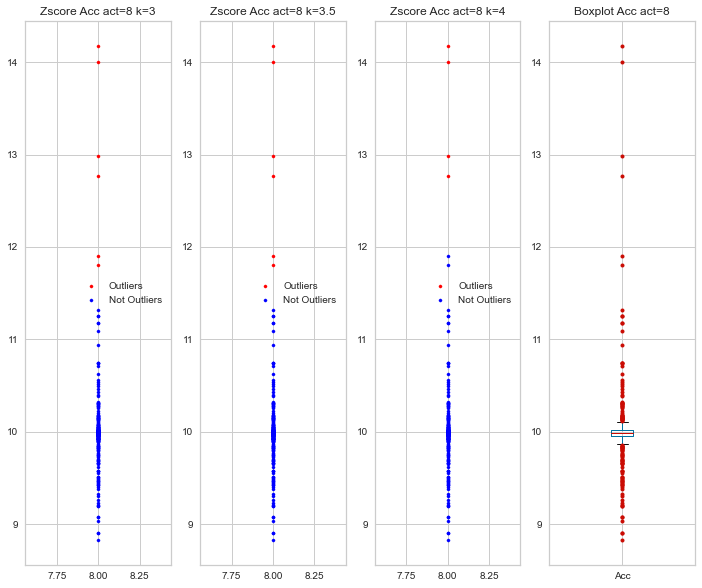

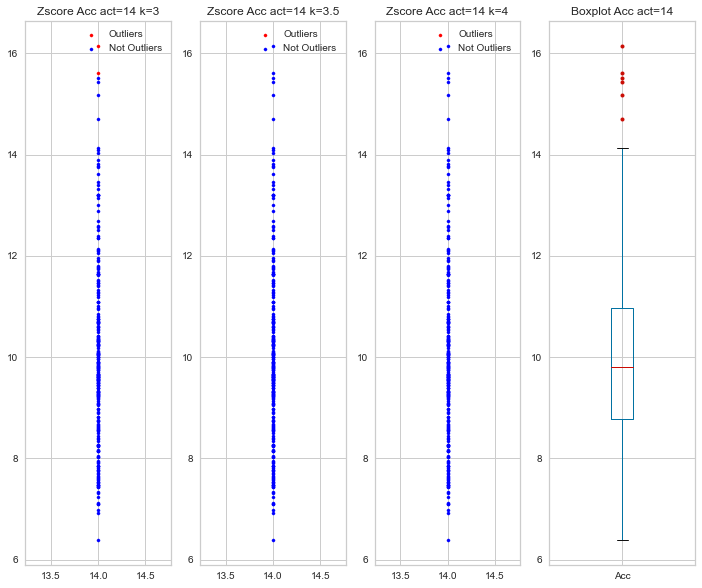

In [6]:
def plotZscore(data,vec_name):
    column = data.columns[0]
    for act in acts:
        data_act = data.loc[data['Label'] == act,column]

        plt.figure(figsize=(3*(len(k_values)+1),10))
        for i in range(1,len(k_values)+1):
            k = k_values[i-1]

            [outliers,not_outliers] = zscore(data_act,k)

            plt.subplot(1,len(k_values)+1,i)
            plt.scatter(np.full((1,outliers.shape[0]),act),outliers,s=10,c='red',label='Outliers')
            plt.scatter(np.full((1,not_outliers.shape[0]),act),not_outliers,s=10,c='blue',label='Not Outliers')
            plt.title('Zscore ' + vec_name + ' act=' + str(act) + ' k=' + str(k))
            plt.legend()

        plt.subplot(1,len(k_values)+1,len(k_values)+1)
        data_act.plot.box(sym='r.')
        plt.title('Boxplot ' + vec_name + ' act=' + str(act))
        plt.savefig('../Plots/Zscores/'+'zscore-act-' + str(act))

def zscore(data,k):
    z = (data - data.mean()) / data.std()
    
    out_pos = z.loc[(z < -k) | (z > k)].index
    not_out_pos = z.loc[(z >= -k) & (z <= k)].index

    out = data.loc[out_pos]
    not_out = data.loc[not_out_pos]

    return [out,not_out]

def outliersZscore(density,data,vec_name,n_act=16):
    column = data.columns[0]
    n_outliers = list() 
        
    for act in acts:
        k_out = list()
        for k in k_values:
            data_act = data.loc[data['Label'] == act,column]
            [out,not_out] = zscore(data_act,k)

            k_out.append(out.shape[0])

        df = pd.DataFrame(k_out)
        df.columns = [act]
        df.index = k_values
        n_outliers.append(df)

    n_outliers = pd.concat(n_outliers,axis=1)
    n_outliers = n_outliers.transpose()

    data_zscore = pd.concat([density[['Label','N Total','N Outliers']],n_outliers],axis=1)
    data_zscore = data_zscore.rename(columns = {'N Outliers': 'Boxplot'})

    for k in k_values:
        data_zscore = data_zscore.rename(columns={k: 'Z-score k=' + str(k)})

    plotZscore(data,vec_name)
    
    dfi.export(data_zscore,'../Plots/Tables/table-zscore-' + vec_name.lower() + '.png')
    
    return data_zscore

acc_zscore = outliersZscore(density_acc,data[['Acc','Label']],'Acc')

display(acc_zscore)

### 3.5.

<p> A análise de outliers através do Boxplot é feito através da densidade. Logo, quando os dados estão concentrados, este método vais ser muito sensível a outliers pois o limite para os definir vai ser curto. No caso do Z-score, os outliers são os valores que estão mais afastados da média <em>x</em> desvios padrões. Olhando para uma distribuição normal, estão mais no exterior da mesma, sendo um algoritmo menos sensível a outliers.

<p> Conseguimos perceber que o estudo da densidade considera certos pontos como outliers quando estes estão num zona concentrada. No caso do Z-score, já conseguimos detetar os outliers quando estes estão mais dispersos e escassos.

In [7]:
def assign_clusters(data, centroids):
    for index, row in data.iterrows():
        for i in range(len(centroids)):
            d_actual = np.sqrt((row['X'] - centroids[int(row['Clusters'])][0])**2 + (row['Y'] - centroids[int(row['Clusters'])][1])**2 + (row['Z'] - centroids[int(row['Clusters'])][2])**2)
            d_compare = np.sqrt((row['X'] - centroids[i][0])**2 + (row['Y'] - centroids[i][1])**2 + (row['Z'] - centroids[i][2])**2)
            if (d_actual > d_compare):
                data.loc[index, 'Clusters'] = i
                data.loc[index, 'Distance'] = d_compare
    return data

def update_centroids(data, centroids):
    for i in range(len(centroids)):
        centroids[i][0] = data['X'].loc[data['Clusters'] == i].mean()
        centroids[i][1] = data['Y'].loc[data['Clusters'] == i].mean()
        centroids[i][2] = data['Z'].loc[data['Clusters'] == i].mean()
    
    return centroids
        
def k_means(n_clusters, data):
    centroids = [[] for _ in range(n_clusters)]
    
    for i in range(n_clusters):
        centroids[i] = data.sample().to_numpy()[0]
        
    data['Clusters'] = 0
    data['Distance'] = 0
    prev_clusters = data['Clusters'].copy()
    
    while(True):
        data = assign_clusters(data, centroids)
        
        if (data['Clusters'].equals(prev_clusters)):
            break
        
        centroids = update_centroids(data, centroids)
        prev_clusters = data['Clusters'].copy()
        
    return [data, centroids]
    

def clusters_kmeans(n_clusters, data, act):
    data = data.loc[data['Act_Label'] == act]
    
    acc_xyz = data[['Acc_X', 'Acc_Y', 'Acc_Z']]
    acc_xyz = acc_xyz.rename(columns={"Acc_X":"X", "Acc_Y":"Y", "Acc_Z":"Z"})
    gyr_xyz = data[['Gyr_X', 'Gyr_Y', 'Gyr_Z']]
    gyr_xyz = gyr_xyz.rename(columns={'Gyr_X':'X', 'Gyr_Y':'Y', 'Gyr_Z':'Z'})
    mag_xyz = data[['Mag_X', 'Mag_Y', 'Mag_Z']]
    mag_xyz = mag_xyz.rename(columns={'Mag_X':'X', 'Mag_Y':'Y', 'Mag_Z':'Z'})
    
    [acc_xyz, centroids] = k_means(n_clusters, acc_xyz)
#     [gyr_xyz, centroids] = k_means(n_clusters, gyr_xyz)
#     [mag_xyz, centroids] = k_means(n_clusters, mag_xyz)
    
    # %matplotlib notebook
    # threedee = plt.figure().gca(projection='3d')
    # for i in range(n_clusters):
    #    cluster_label = 'Cluster '+str(i)
    #    plot_data = acc_xyz.loc[acc_xyz['Clusters'] == i]
    #    threedee.scatter(plot_data['X'], plot_data['Y'], plot_data['Z'], marker='o', label=cluster_label)
    # title = 'Accelerometer kmeans'
    # plt.title(title)
    # threedee.legend()
    
#     fig2 = plt.figure()
#     ax = plt.axes(projection='3d')
#     for i in range(n_clusters):
#         plot_data = gyr_xyz.loc[gyr_xyz['Clusters'] == i]
#         ax.scatter3D(plot_data['X'], plot_data['Y'], plot_data['Z'])
    
#     fig3 = plt.figure()
#     ax = plt.axes(projection='3d')
#     for i in range(n_clusters):
#         plot_data = mag_xyz.loc[mag_xyz['Clusters'] == i]
#         ax.scatter3D(plot_data['X'], plot_data['Y'], plot_data['Z'])
    kmeanModel = KMeans(n_clusters=n_clusters)
    kmeanModel.fit(acc_xyz)

    return [acc_xyz,kmeanModel.inertia_]
    
# acc_clusters = clusters_kmeans(6, data, 1)

In [8]:
def createDf(clusters=[2],n_act=16):
    dfs = list()
    elbow = list()
    for clust in clusters:
        vec = list()
        vec_elbow = list()
        for act in range(1,n_act+1):
            vec.append(None)
            vec_elbow.append(None)
        elbow.append(vec_elbow)
        df = pd.DataFrame(vec)
        df.columns = [clust]
        dfs.append(df)
    
    dfs = pd.concat(dfs,axis=1)
    dfs.index = dfs.index+1

    return [dfs,elbow]

# clusters_values = [2,3,4,5,6,7,8]
# [kmeans_vec,elbow] = createDf(clusters_values)

In [9]:
def outliersKmeans(data,kmeans_vec,elbow,n_clust=7,n_act=16):
    for act in kmeans_vec.index:
        print('act',act)
        for clust in [6]:
            print('clust',clust)
            if(kmeans_vec[clust][act] == None):
                [clusters,dist] = clusters_kmeans(clust, data, act)
                elbow[clust-clusters_values[0]][act-1] = dist
                count = clusters['Clusters'].value_counts()
                minCluster = clusters.loc[clusters['Clusters'] == count.index[-1]]
                kmeans_vec[clust][act] = minCluster.shape[0]

    elbow = pd.DataFrame(elbow)

    return [kmeans_vec,elbow]

# display(acc_clusters)
# display(acc_clusters)
# print(kmeans_vec.index)
# [kmeans_vec,elbow] = outliersKmeans(data,kmeans_vec,elbow)
# display(kmeans_vec)
# display(elbow)


In [10]:
# elbow = np.array(elbow)
# plt.plot(clusters_values,elbow[:,0])

# display(kmeans_vec)
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(4,12))

# act = 8
# x = data.loc[data['Act_Label'] == act,['Acc_X','Acc_Y']].to_numpy()
# print(x)
# visualizer.fit(x)        # Fit the data to the visualizer
# visualizer.show()


### 3.7.

<p> O k-means é um algoritmo que, quando utilizado para detetar outliers, separa-os devido às suas coordenadas. Ou seja, um ponto tem de estar afastado dos restantes pontos. Ao contrário deste algoritmo, o z-score avalia os outliers pela sua distância ao centro. Pode acontecer um ponto ter uma coordenada muito mais alta que as outras e é considerado outlier pelo z-score mas não pelo k-means pois pode estar próximo de outros pontos e formar um cluster.</p>

## Exercício 3.8

In [13]:
def outlier_injection_zscore(data, x, density, k=3):
    column = data.columns[0]
    for act in acts:
        print(act)
        data_act = data.loc[data['Label'] == act,column]
        n_samples = data_act.shape[0]

        [outliers,not_outliers] = zscore(data_act, k) 
        n_out = outliers.shape[0]
        out_dens = n_out / n_samples * 100
        print('out_dens initial:',out_dens)
        while(out_dens < 0.99*x):
            mean = data_act.mean()
            std = data_act.std()

            if(n_out > 0):
                max_out = outliers.abs().max()
                print('max_out',max_out)
                z = max_out - (mean + k*std)

            else:
                z = 3

            d = x - out_dens
            num_inj = int(np.ceil(d * n_samples / 100))
            print('inj points',num_inj)

            inj_points = not_outliers.sample(num_inj)
            
            for index in inj_points.index:
                s = np.random.randint(2)
                if s == 0:
                    s = -1
                q = np.random.uniform(0, z)
                data_act[index] = mean + s*k*(std + q)

            [outliers,not_outliers] = zscore(data_act, k) 
            n_out = outliers.shape[0]
            out_dens = n_out / n_samples * 100

            print('out_dens:',out_dens)

        data[data_act.index,column] = data_act
    return data


# display(outliersZscore(acc, 'ACC'))
acc_injection = outlier_injection_zscore(data[['Acc','Label']], 10, density_acc)
# display(outliersZscore(acc_injection, 'ACC INJ'))

# 1 out inicial  6.919723937522702
# out novo  9.244460588448964
# out novo  9.916454776607338
# 8 out inicial  30.208333333333332
# 14 out inicial  2.3622047244094486
# out novo  9.448818897637794

1
out_dens initial: 1.1623683254631312
max_out 15.131683927772217
inj points 974
out_dens: 4.222666182346531
max_out 24.08500680722625
inj points 637
out_dens: 3.641482019614965
max_out 37.30375344077278
inj points 701
out_dens: 3.814021067925899
max_out 61.38191961166533
inj points 682
out_dens: 3.7232110424990914
max_out 102.5910493181883
inj points 692
out_dens: 3.6505630221576464
max_out 172.57155168038972
inj points 700
out_dens: 3.4961859789320737
max_out 291.96023948099685
inj points 717
out_dens: 3.659644024700327
max_out 490.86072474469177
inj points 699
out_dens: 3.5869960043588813
max_out 817.9477566953468
inj points 707
out_dens: 3.3872139484199058
max_out 1358.8473750414007
inj points 729
out_dens: 3.4235379585906287
max_out 2262.308329132344
inj points 725
out_dens: 3.468942971304032
max_out 3694.83282167589
inj points 720
out_dens: 3.532509989102797
max_out 5893.16136051404
inj points 713
out_dens: 3.1874318924809297
max_out 9258.277889731835
inj points 751
out_dens: 3.3

KeyboardInterrupt: 

# Exercício 3.9

In [13]:
def linear_model(window, p):
    y = np.matrix([ [window[i]] for i in range(p, len(window)) ])
    x = []
    for i in range(p, len(window)):
        aux = [window[i - j] for j in range(1, p+1)]
        aux.insert(0, 1)
        x.append(aux)
    x = np.matrix(x)
    
    b = np.dot(np.linalg.pinv(x), y)
    
    return np.squeeze(np.asarray(b))
    
print(linear_model([1, 5, 2, 10, 7, 3, 9], 2))

[ 8.77096744e+00 -4.71872376e-01 -4.57132195e-03]


# Exercício 3.10